In [14]:
%matplotlib inline

from modsim import *

In [15]:
from pandas import read_html

In [16]:
url = 'https://en.wikipedia.org/wiki/World_population'
tables = read_html(url, header=0, index_col=0, decimal='M')

In [17]:
table13 = tables[13]
table13

,World,Asia,Africa,Europe,Latin America/Caribbean,Northern America,Oceania
Year,,,,,,,
2010,6916,"4,165 (60.2%)","1,031 (14.9%)",740 (10.7%),596 (8.6%),347 (5.0%),37 (0.5%)
2015,7324,"4,385 (59.9%)","1,166 (15.9%)",743 (10.1%),630 (8.6%),361 (4.9%),39 (0.5%)
2020,7717,"4,582 (59.4%)","1,312 (17.0%)",744 (9.6%),662 (8.6%),376 (4.9%),42 (0.5%)
2025,8083,"4,749 (58.8%)","1,468 (18.2%)",741 (9.2%),691 (8.5%),390 (4.8%),45 (0.6%)
2030,8425,"4,887 (58.0%)","1,634 (19.4%)",736 (8.7%),717 (8.5%),403 (4.8%),47 (0.6%)
2035,8743,"4,997 (57.2%)","1,812 (20.7%)",730 (8.3%),739 (8.5%),415 (4.8%),50 (0.6%)
2040,9039,"5,080 (56.2%)","1,999 (22.1%)",724 (8.0%),757 (8.4%),426 (4.8%),52 (0.6%)
2045,9308,"5,136 (55.2%)","2,194 (23.6%)",717 (7.7%),771 (8.3%),436 (4.7%),55 (0.6%)
2050,9551,"5,164 (54.1%)","2,393 (25.1%)",709 (7.4%),782 (8.2%),446 (4.7%),57 (0.6%)


In [18]:
world = table13.World
world

Year
2010     6916
2015     7324
2020     7717
2025     8083
2030     8425
2035     8743
2040     9039
2045     9308
2050     9551
2055     9766
2060     9957
2065    10127
2070    10277
2075    10409
2080    10524
2085    10626
2090    10717
2095    10794
2100    10854
Name: World, dtype: int64

In [19]:
def plot_estimates(table):
    """Plot world population estimates.
    
    table: DataFrame with columns 'un' and 'census'
    """
    
    plot(world,':',color='darkblue', label='World')
    
    decorate(xlabel='Year',
             ylabel='World population (million)',
            title=' Predicted World population [2010 - 2100]')

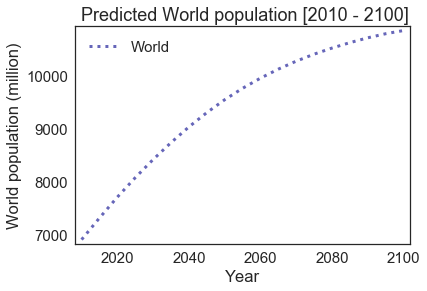

In [20]:
newfig()
plot_estimates(world)

In [21]:
t0 = world.index[0]
t_end = world.index[-1]
total_growth = world[t_end] - world[t0]
elapsed_time = t_end - t0
annual_growth = total_growth / elapsed_time

In [22]:
system = System(t0=t0, 
                t_end=t_end,
                p0=world[t0],
                annual_growth=annual_growth)

In [23]:
def run_simulation(system):
    """Runs the constant growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: system object
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = results[t] + system.annual_growth
    system.results = results

In [24]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot_estimates(table13)
    plot(system.results, '--', color='gray', label='model')
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

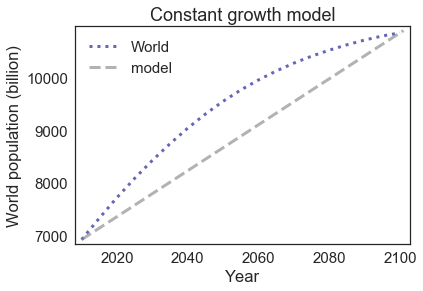

In [25]:
run_simulation(system)
plot_results(system, title='Constant growth model')

In [26]:
def run_simulation1b(system):
    """Runs the constant growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: system object
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = results[t] 
    system.results = results

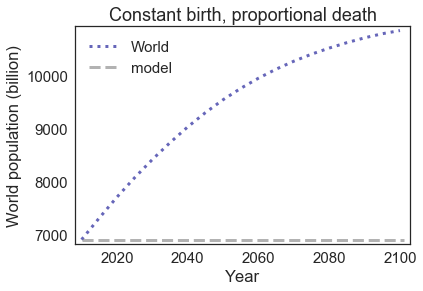

In [27]:
run_simulation1b(system)
plot_results(system, title='Constant birth, proportional death')

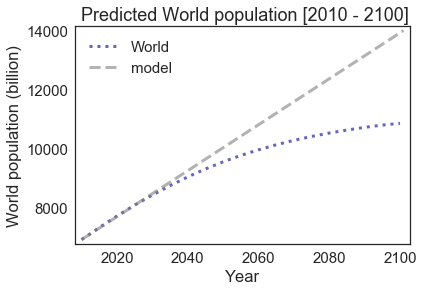

In [51]:
first_year = 2010
last_year = 2025
total_growth = world[last_year] - world[first_year]
elapsed_time = last_year - first_year 
annual_growth = total_growth / elapsed_time

results = TimeSeries()
results[2010] = world[2010] 
for t in linrange(2010, 2100):
    results[t+1] = results[t] + annual_growth 
    
newfig()
plot_estimates(table13)
plot(results, '--', color='gray', label='model')
decorate(xlabel='Year', ylabel='World population (billion)')

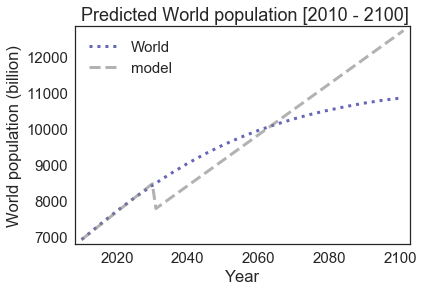

In [59]:
first_year1 = 2010
last_year1 = 2025
total_growth1 = world[last_year1] - world[first_year1]
elapsed_time1 = last_year1 - first_year1 
annual_growth1 = total_growth1 / elapsed_time1

first_year2 = 2030
last_year2 = 2100
total_growth2 = world[last_year2] - world[first_year2]
elapsed_time2 = last_year2 - first_year2 
annual_growth2 = total_growth2 / elapsed_time2

results = TimeSeries()
results[2010] = world[2010] 
for t in linrange(2010, 2100):
    results[t+1] = results[t] + annual_growth1 
    
for t in linrange(2030, 2100):
    results[t+1] = results[t+1] - results[t+1] * 0.09
    
newfig()
plot_estimates(table13)
plot(results, '--', color='gray', label='model')
decorate(xlabel='Year', ylabel='World population (billion)')